<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [76]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import tensorflow as tf
import plotly.graph_objects as go
import pandas_datareader as data
import streamlit as st

# Define start day to fetch the dataset from the yahoo finance library





In [77]:
import yfinance as yf

START = "2010-01-01"
END = "2025-05-12"

# Download multiple tickers
df = yf.download(['POWERGRID.NS', 'ONGC.NS'], start=START, end=END, group_by='ticker')

df.head()


[*********************100%***********************]  2 of 2 completed


Ticker         ONGC.NS                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2010-01-04  100.357018  101.721254  100.271750  101.248039  1905762   
2010-01-05  101.644530  103.597100  101.392997  103.021561  4657392   
2010-01-06  103.349834  104.620287  102.932036  104.321861  4203690   
2010-01-07  104.108695  105.293879  103.170781  104.432701  6394536   
2010-01-08  104.449743  105.609347  103.170767  103.656776  5678652   

Ticker     POWERGRID.NS                                            
Price              Open       High        Low      Close   Volume  
Date                                                               
2010-01-04    36.555877  37.534460  36.522706  37.285667  4353415  
2010-01-05    37.484691  37.949102  37.235899  37.401760  4374738  
2010-01-06    37.683731  37.949108  37.484697  37.667145  5549959  
2010-01-07    37.783252  38.231079  37.385185  37.998871  4535147  
2010-01-08    38.181316  38.413519  37.833004  38.098385  3809958

In [78]:
df.head()

Ticker         ONGC.NS                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2010-01-04  100.357018  101.721254  100.271750  101.248039  1905762   
2010-01-05  101.644530  103.597100  101.392997  103.021561  4657392   
2010-01-06  103.349834  104.620287  102.932036  104.321861  4203690   
2010-01-07  104.108695  105.293879  103.170781  104.432701  6394536   
2010-01-08  104.449743  105.609347  103.170767  103.656776  5678652   

Ticker     POWERGRID.NS                                            
Price              Open       High        Low      Close   Volume  
Date                                                               
2010-01-04    36.555877  37.534460  36.522706  37.285667  4353415  
2010-01-05    37.484691  37.949102  37.235899  37.401760  4374738  
2010-01-06    37.683731  37.949108  37.484697  37.667145  5549959  
2010-01-07    37.783252  38.231079  37.385185  37.998871  4535147  
2010-01-08    38.181316  38.413519  37.833004  38.098385  3809958

In [79]:
df.tail()

Ticker         ONGC.NS                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-05-05  240.000000  241.149994  234.500000  239.199997  20086323   
2025-05-06  241.130005  242.990005  236.000000  237.000000  11350559   
2025-05-07  232.300003  240.089996  232.070007  238.669998  16689539   
2025-05-08  237.660004  239.339996  231.399994  233.220001  15026122   
2025-05-09  229.100006  235.300003  228.449997  234.960007  11184507   

Ticker     POWERGRID.NS                                                
Price              Open        High         Low       Close    Volume  
Date                                                                   
2025-05-05   304.799988  310.700012  304.649994  308.200012   4342960  
2025-05-06   307.600006  310.450012  305.549988  307.600006   9124804  
2025-05-07   308.000000  313.149994  307.000000  311.100006  14679327  
2025-05-08   313.399994  317.399994  304.000000  308.250000  19253478  
2025-05-09   300.000000  303.049988  296.399994  299.299988  11981497

In [80]:
df=df.reset_index()
df.head()

Ticker       Date     ONGC.NS                                               \
Price                    Open        High         Low       Close   Volume   
0      2010-01-04  100.357018  101.721254  100.271750  101.248039  1905762   
1      2010-01-05  101.644530  103.597100  101.392997  103.021561  4657392   
2      2010-01-06  103.349834  104.620287  102.932036  104.321861  4203690   
3      2010-01-07  104.108695  105.293879  103.170781  104.432701  6394536   
4      2010-01-08  104.449743  105.609347  103.170767  103.656776  5678652   

Ticker POWERGRID.NS                                            
Price          Open       High        Low      Close   Volume  
0         36.555877  37.534460  36.522706  37.285667  4353415  
1         37.484691  37.949102  37.235899  37.401760  4374738  
2         37.683731  37.949108  37.484697  37.667145  5549959  
3         37.783252  38.231079  37.385185  37.998871  4535147  
4         38.181316  38.413519  37.833004  38.098385  3809958

In [81]:
df.shape

(3787, 11)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (Date, )                3787 non-null   datetime64[ns]
 1   (ONGC.NS, Open)         3787 non-null   float64       
 2   (ONGC.NS, High)         3787 non-null   float64       
 3   (ONGC.NS, Low)          3787 non-null   float64       
 4   (ONGC.NS, Close)        3787 non-null   float64       
 5   (ONGC.NS, Volume)       3787 non-null   int64         
 6   (POWERGRID.NS, Open)    3787 non-null   float64       
 7   (POWERGRID.NS, High)    3787 non-null   float64       
 8   (POWERGRID.NS, Low)     3787 non-null   float64       
 9   (POWERGRID.NS, Close)   3787 non-null   float64       
 10  (POWERGRID.NS, Volume)  3787 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 325.6 KB


In [83]:
df.columns

MultiIndex([(        'Date',       ''),
            (     'ONGC.NS',   'Open'),
            (     'ONGC.NS',   'High'),
            (     'ONGC.NS',    'Low'),
            (     'ONGC.NS',  'Close'),
            (     'ONGC.NS', 'Volume'),
            ('POWERGRID.NS',   'Open'),
            ('POWERGRID.NS',   'High'),
            ('POWERGRID.NS',    'Low'),
            ('POWERGRID.NS',  'Close'),
            ('POWERGRID.NS', 'Volume')],
           names=['Ticker', 'Price'])

In [84]:
df.isnull().sum()

Ticker        Price 
Date                    0
ONGC.NS       Open      0
              High      0
              Low       0
              Close     0
              Volume    0
POWERGRID.NS  Open      0
              High      0
              Low       0
              Close     0
              Volume    0
dtype: int64

In [85]:
print(df.columns)
print(df.index)


MultiIndex([(        'Date',       ''),
            (     'ONGC.NS',   'Open'),
            (     'ONGC.NS',   'High'),
            (     'ONGC.NS',    'Low'),
            (     'ONGC.NS',  'Close'),
            (     'ONGC.NS', 'Volume'),
            ('POWERGRID.NS',   'Open'),
            ('POWERGRID.NS',   'High'),
            ('POWERGRID.NS',    'Low'),
            ('POWERGRID.NS',  'Close'),
            ('POWERGRID.NS', 'Volume')],
           names=['Ticker', 'Price'])
RangeIndex(start=0, stop=3787, step=1)


In [86]:
df.describe()

Ticker                           Date      ONGC.NS                            \
Price                                         Open         High          Low   
count                            3787  3787.000000  3787.000000  3787.000000   
mean    2017-09-03 11:01:37.913916160   123.049136   124.634228   121.208347   
min               2010-01-04 00:00:00    41.942175    44.484125    35.304860   
25%               2013-10-29 12:00:00    95.988220    97.379965    94.533259   
50%               2017-09-06 00:00:00   110.714836   112.153652   109.039424   
75%               2021-07-07 12:00:00   128.444137   130.009759   126.501182   
max               2025-05-09 00:00:00   326.768847   327.623511   320.168882   
std                               NaN    48.796241    49.358752    48.030000   

Ticker                            POWERGRID.NS                            \
Price         Close        Volume         Open         High          Low   
count   3787.000000  3.787000e+03  3787.000000  3787.000000  3787.000000   
mean     122.813581  1.167758e+07    93.395492    94.530620    92.236811   
min       42.365833  0.000000e+00    31.308205    31.980776    30.648630   
25%       95.859127  4.844624e+06    39.690339    40.129474    39.326599   
50%      110.499565  7.701984e+06    73.246928    74.239353    72.361896   
75%      127.905869  1.337241e+07   106.617987   107.533931   105.373796   
max      324.537201  1.780948e+08   354.749603   356.893408   348.074624   
std       48.682417  1.276749e+07    74.754075    75.706577    73.772475   

Ticker                             
Price         Close        Volume  
count   3787.000000  3.787000e+03  
mean      93.375743  1.173555e+07  
min       31.560417  0.000000e+00  
25%       39.699053  5.000802e+06  
50%       73.220032  8.768284e+06  
75%      106.450054  1.405735e+07  
max      356.113861  5.087530e+08  
std       74.763180  1.536347e+07

In [87]:


# Drop 'Date' and 'Adj Close' columns
df = df.drop(['Date'], axis=1)
df.head()




C:\Users\admin\AppData\Local\Temp\ipykernel_8220\188008877.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Ticker     ONGC.NS                                              POWERGRID.NS  \
Price         Open        High         Low       Close   Volume         Open   
0       100.357018  101.721254  100.271750  101.248039  1905762    36.555877   
1       101.644530  103.597100  101.392997  103.021561  4657392    37.484691   
2       103.349834  104.620287  102.932036  104.321861  4203690    37.683731   
3       104.108695  105.293879  103.170781  104.432701  6394536    37.783252   
4       104.449743  105.609347  103.170767  103.656776  5678652    38.181316   

Ticker                                            
Price        High        Low      Close   Volume  
0       37.534460  36.522706  37.285667  4353415  
1       37.949102  37.235899  37.401760  4374738  
2       37.949108  37.484697  37.667145  5549959  
3       38.231079  37.385185  37.998871  4535147  
4       38.413519  37.833004  38.098385  3809958

In [88]:
df.head()

Ticker     ONGC.NS                                              POWERGRID.NS  \
Price         Open        High         Low       Close   Volume         Open   
0       100.357018  101.721254  100.271750  101.248039  1905762    36.555877   
1       101.644530  103.597100  101.392997  103.021561  4657392    37.484691   
2       103.349834  104.620287  102.932036  104.321861  4203690    37.683731   
3       104.108695  105.293879  103.170781  104.432701  6394536    37.783252   
4       104.449743  105.609347  103.170767  103.656776  5678652    38.181316   

Ticker                                            
Price        High        Low      Close   Volume  
0       37.534460  36.522706  37.285667  4353415  
1       37.949102  37.235899  37.401760  4374738  
2       37.949108  37.484697  37.667145  5549959  
3       38.231079  37.385185  37.998871  4535147  
4       38.413519  37.833004  38.098385  3809958

[*********************100%***********************]  2 of 2 completed


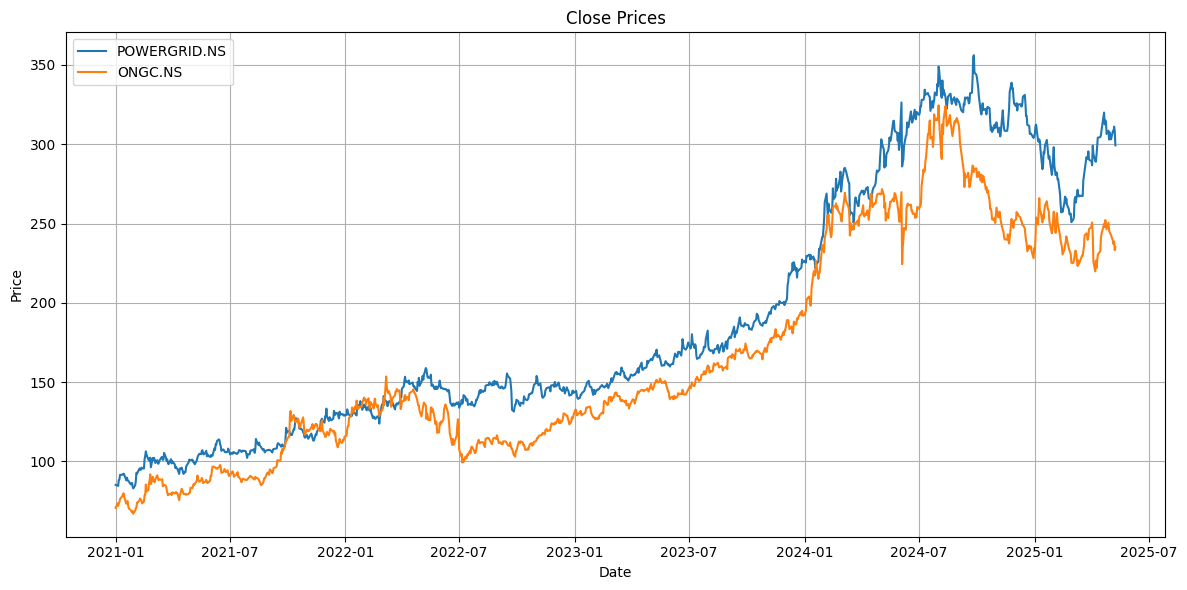

In [89]:
import matplotlib.pyplot as plt
import yfinance as yf

START = "2021-01-01"
END = "2025-05-12"

tickers = ['POWERGRID.NS', 'ONGC.NS']
df = yf.download(tickers, start=START, end=END, group_by='ticker')

# Plot Close price for each ticker
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(df[ticker]['Close'], label=ticker)

plt.title("Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
ma100_powergrid = df['POWERGRID.NS']['Close'].rolling(100).mean()
ma100_ongc = df['ONGC.NS']['Close'].rolling(100).mean()


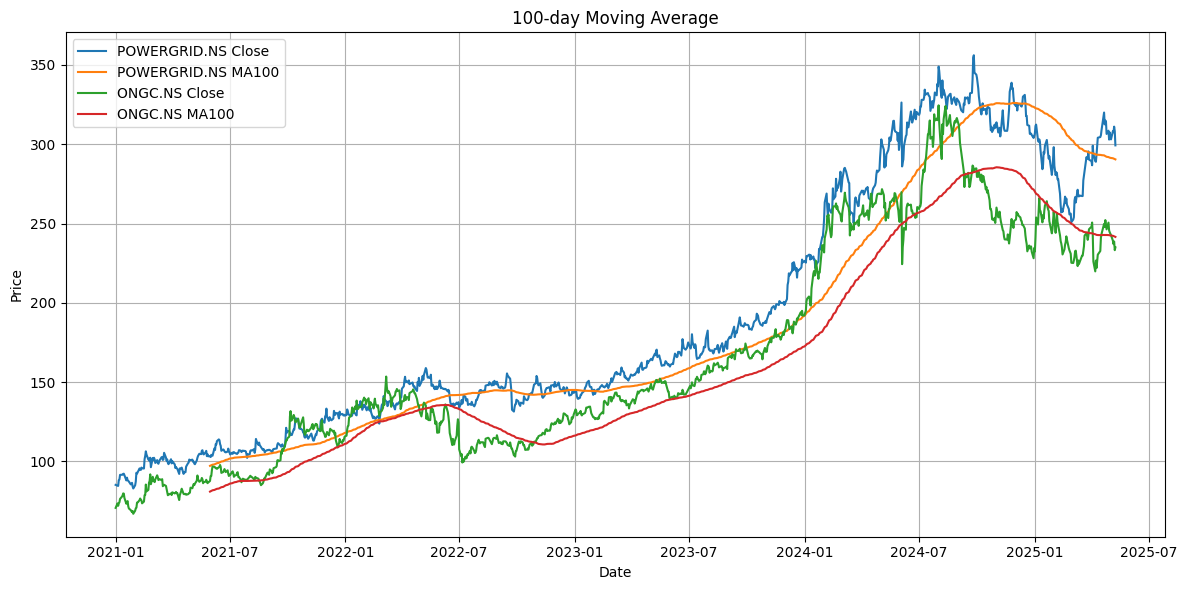

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['POWERGRID.NS']['Close'], label='POWERGRID.NS Close')
plt.plot(ma100_powergrid, label='POWERGRID.NS MA100')
plt.plot(df['ONGC.NS']['Close'], label='ONGC.NS Close')
plt.plot(ma100_ongc, label='ONGC.NS MA100')
plt.title('100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Visualizing Closing Price

In [92]:
ma200_powergrid = df['POWERGRID.NS']['Close'].rolling(200).mean()
ma200_ongc = df['ONGC.NS']['Close'].rolling(200).mean()

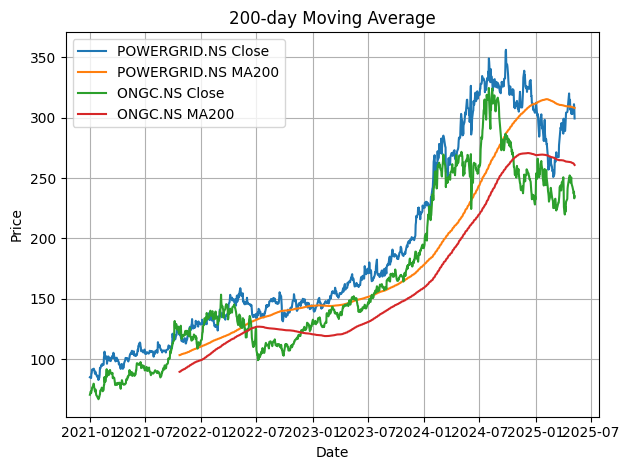

In [93]:
plt.plot(df['POWERGRID.NS']['Close'], label='POWERGRID.NS Close')
plt.plot(ma200_powergrid, label='POWERGRID.NS MA200')
plt.plot(df['ONGC.NS']['Close'], label='ONGC.NS Close')
plt.plot(ma200_ongc, label='ONGC.NS MA200')
plt.title('200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
df.shape

(1074, 10)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma100, 'r', label='100-day MA') 
plt.plot(ma200, 'g', label='100-day MA') 

In [95]:
df.columns

MultiIndex([('POWERGRID.NS',   'Open'),
            ('POWERGRID.NS',   'High'),
            ('POWERGRID.NS',    'Low'),
            ('POWERGRID.NS',  'Close'),
            ('POWERGRID.NS', 'Volume'),
            (     'ONGC.NS',   'Open'),
            (     'ONGC.NS',   'High'),
            (     'ONGC.NS',    'Low'),
            (     'ONGC.NS',  'Close'),
            (     'ONGC.NS', 'Volume')],
           names=['Ticker', 'Price'])

In [96]:
data01_POW = df.to_csv("powergrid.csv")
data01_ONG = df.to_csv("ongc.csv")


In [97]:
data01_POW = pd.read_csv("powergrid.csv")
data01_ONG = pd.read_csv("ongc.csv")

In [98]:
data01_POW
data01_ONG

,Ticker,POWERGRID.NS,POWERGRID.NS.1,POWERGRID.NS.2,POWERGRID.NS.3,POWERGRID.NS.4,ONGC.NS,ONGC.NS.1,ONGC.NS.2,ONGC.NS.3,ONGC.NS.4
0,Price,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,84.98641094918777,85.39111293621677,84.76157922259429,85.21124267578125,3074621,71.11098098708979,71.64194066364948,70.54209313919307,70.69379425048828,15130377
3,2021-01-04,85.4360888850107,85.61595917593681,84.53676182618803,84.7391128540039,7133203,71.33852852349288,73.80370885499973,71.07304293509472,73.53822326660156,39545073
4,2021-01-05,85.21124599954695,85.21124599954695,83.72735898572958,84.53675079345703,10478882,73.19690600119596,73.19690600119596,71.56609294842718,72.02120208740234,26998014
...,...,...,...,...,...,...,...,...,...,...,...
1071,2025-05-05,304.79998779296875,310.70001220703125,304.6499938964844,308.20001220703125,4342960,240.0,241.14999389648438,234.5,239.1999969482422,20086323
1072,2025-05-06,307.6000061035156,310.45001220703125,305.54998779296875,307.6000061035156,9124804,241.1300048828125,242.99000549316406,236.0,237.0,11350559
1073,2025-05-07,308.0,313.1499938964844,307.0,311.1000061035156,14679327,232.3000030517578,240.08999633789062,232.07000732421875,238.6699981689453,16689539
1074,2025-05-08,313.3999938964844,317.3999938964844,304.0,308.25,19253478,237.66000366210938,239.33999633789062,231.39999389648438,233.22000122070312,15026122


In [99]:
data01_POW.head()
data01_ONG.head()

,Ticker,POWERGRID.NS,POWERGRID.NS.1,POWERGRID.NS.2,POWERGRID.NS.3,POWERGRID.NS.4,ONGC.NS,ONGC.NS.1,ONGC.NS.2,ONGC.NS.3,ONGC.NS.4
0,Price,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,84.98641094918777,85.39111293621677,84.76157922259429,85.21124267578125,3074621,71.11098098708979,71.64194066364948,70.54209313919307,70.69379425048828,15130377
3,2021-01-04,85.4360888850107,85.61595917593681,84.53676182618803,84.7391128540039,7133203,71.33852852349288,73.80370885499973,71.07304293509472,73.53822326660156,39545073
4,2021-01-05,85.21124599954695,85.21124599954695,83.72735898572958,84.53675079345703,10478882,73.19690600119596,73.19690600119596,71.56609294842718,72.02120208740234,26998014


In [100]:
import webbrowser
webbrowser.open("candlestick_chart.html")


True

In [75]:
data01_POW.head()
data01_ONG.head()

,Ticker,AAPL.NS,AAPL.NS.1,AAPL.NS.2,AAPL.NS.3,AAPL.NS.4,AAPL.NS.5,ONGC.NS,ONGC.NS.1,ONGC.NS.2,ONGC.NS.3,ONGC.NS.4,POWERGRID.NS,POWERGRID.NS.1,POWERGRID.NS.2,POWERGRID.NS.3,POWERGRID.NS.4
0,Price,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,100.3570179748269,101.7212542710527,100.2717502789681,101.24803924560547,1905762,36.555877384436336,37.53445963020358,36.522706439451134,37.285667419433594,4353415
3,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,101.64452977632394,103.5971001140232,101.39299668171537,103.02156066894531,4657392,37.484690813297874,37.94910190052733,37.23589867735934,37.40176010131836,4374738
4,2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,103.34983436120352,104.62028654022187,102.93203585631719,104.32186126708984,4203690,37.68373137033265,37.949107890845504,37.48469673030812,37.667144775390625,5549959


In [50]:
#moving Average

In [101]:
df

Ticker     POWERGRID.NS                                                \
Price              Open        High         Low       Close    Volume   
Date                                                                    
2021-01-01    84.986411   85.391113   84.761579   85.211243   3074621   
2021-01-04    85.436089   85.615959   84.536762   84.739113   7133203   
2021-01-05    85.211246   85.211246   83.727359   84.536751  10478882   
2021-01-06    84.536768   88.853539   84.087104   88.201530  54265234   
2021-01-07    89.033392   90.742110   87.909233   88.606209  40129922   
...                 ...         ...         ...         ...       ...   
2025-05-05   304.799988  310.700012  304.649994  308.200012   4342960   
2025-05-06   307.600006  310.450012  305.549988  307.600006   9124804   
2025-05-07   308.000000  313.149994  307.000000  311.100006  14679327   
2025-05-08   313.399994  317.399994  304.000000  308.250000  19253478   
2025-05-09   300.000000  303.049988  296.399994  299.299988  11981497   

Ticker         ONGC.NS                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2021-01-01   71.110981   71.641941   70.542093   70.693794  15130377  
2021-01-04   71.338529   73.803709   71.073043   73.538223  39545073  
2021-01-05   73.196906   73.196906   71.566093   72.021202  26998014  
2021-01-06   75.017335   75.320743   73.007264   73.538223  50306161  
2021-01-07   74.334685   75.131131   73.652019   74.258835  25285200  
...                ...         ...         ...         ...       ...  
2025-05-05  240.000000  241.149994  234.500000  239.199997  20086323  
2025-05-06  241.130005  242.990005  236.000000  237.000000  11350559  
2025-05-07  232.300003  240.089996  232.070007  238.669998  16689539  
2025-05-08  237.660004  239.339996  231.399994  233.220001  15026122  
2025-05-09  229.100006  235.300003  228.449997  234.960007  11184507  

[1074 rows x 10 columns]

In [102]:
temp_data = [10,20,30,40,50,60,70,80,90]
print(sum(temp_data[2:7])/5)

50.0


In [103]:
df = pd.DataFrame(temp_data)
df.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [104]:
df

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


# Plotting moving averages of 100 day

---



In [105]:
import pandas as pd
import yfinance as yf

# Download data
df = yf.download('POWERGRID.NS', start="2021-01-01", end="2024-12-31")

# Compute 100-day moving average
ma100_powergrid = df['Close'].rolling(100).mean()
ma100_ongc = df['Close'].rolling(100).mean()
# Display
print(ma100_powergrid.tail())
print(ma100_ongc.tail())


[*********************100%***********************]  1 of 1 completed

Ticker      POWERGRID.NS
Date                    
2024-12-23    324.990060
2024-12-24    324.690146
2024-12-26    324.267542
2024-12-27    323.863584
2024-12-30    323.590652
Ticker      POWERGRID.NS
Date                    
2024-12-23    324.990060
2024-12-24    324.690146
2024-12-26    324.267542
2024-12-27    323.863584
2024-12-30    323.590652


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

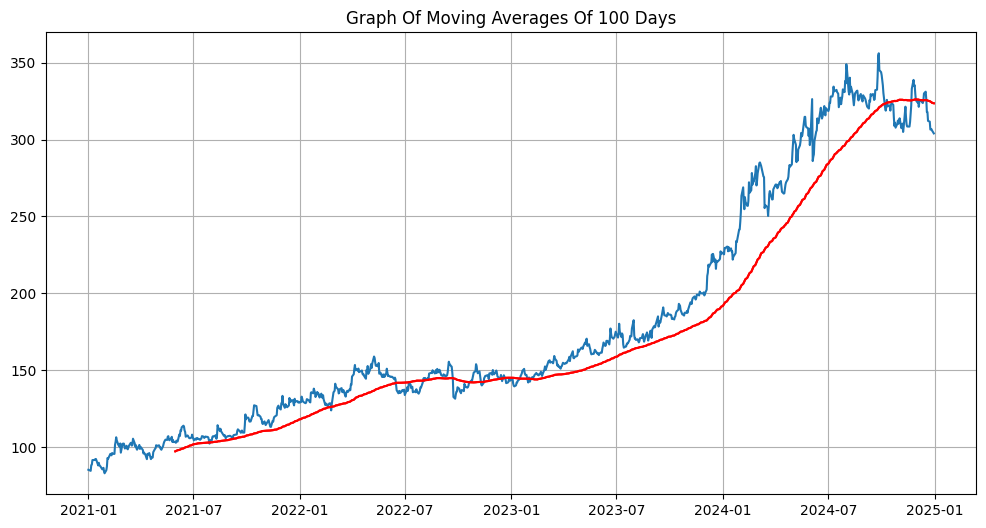

In [109]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100_powergrid, 'r')
plt.plot(ma100_ongc, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [110]:
ma200_powergrid = df['Close'].rolling(200).mean()
ma200_ongc = df['Close'].rolling(200).mean()
ma200_powergrid
ma200_ongc

Ticker,POWERGRID.NS
Date,
2021-01-01,NaN
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
...,...
2024-12-23,310.866974
2024-12-24,311.032795
2024-12-26,311.176168


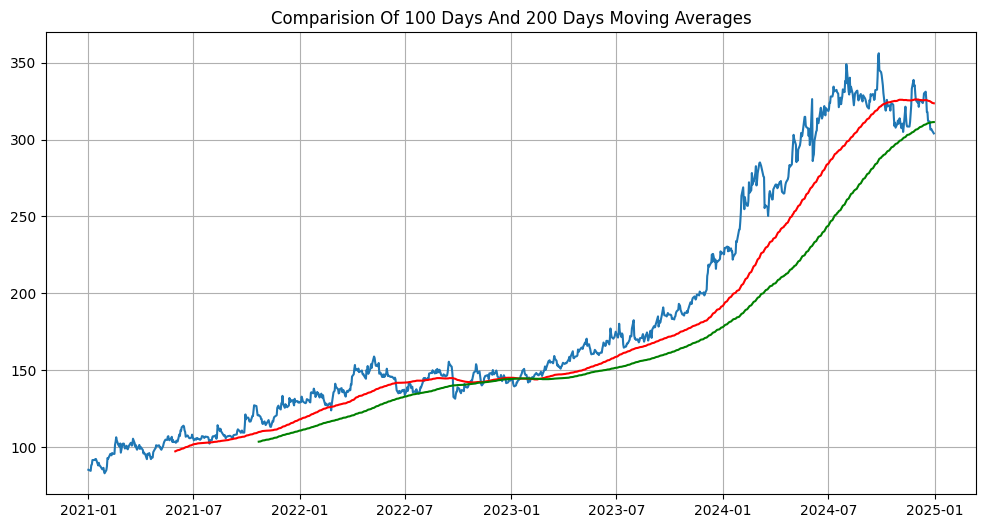

In [111]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100_powergrid, 'r')
plt.plot(ma200_powergrid, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')
plt.show()

In [39]:
ema100 = df.Close.ewm(span = 100 ,adjust = False).mean()

In [40]:
ema200 = df['Close'].ewm(span = 200 ,adjust = False).mean()

In [41]:
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.003114,1.104754e-02,1.952794e-02,0.025409,0.004898
2010-01-06,0.007095,-4.870743e-07,6.681023e-03,0.005309,0.268638
2010-01-07,0.008807,7.430249e-03,-2.654723e-03,0.002641,-0.182850
2010-01-08,0.002619,4.771951e-03,1.197843e-02,0.010535,-0.159904
...,...,...,...,...,...
2024-12-23,-0.001583,-2.242024e-02,-6.537086e-03,-0.010271,-0.571746
2024-12-24,-0.016492,-5.183740e-03,-8.987252e-03,-0.012264,-0.192271


In [42]:
ema100 = df.Close.ewm(span = 100 ,adjust = False).mean()

In [43]:
ema200 = df['Close'].ewm(span = 100 ,adjust = False).mean()

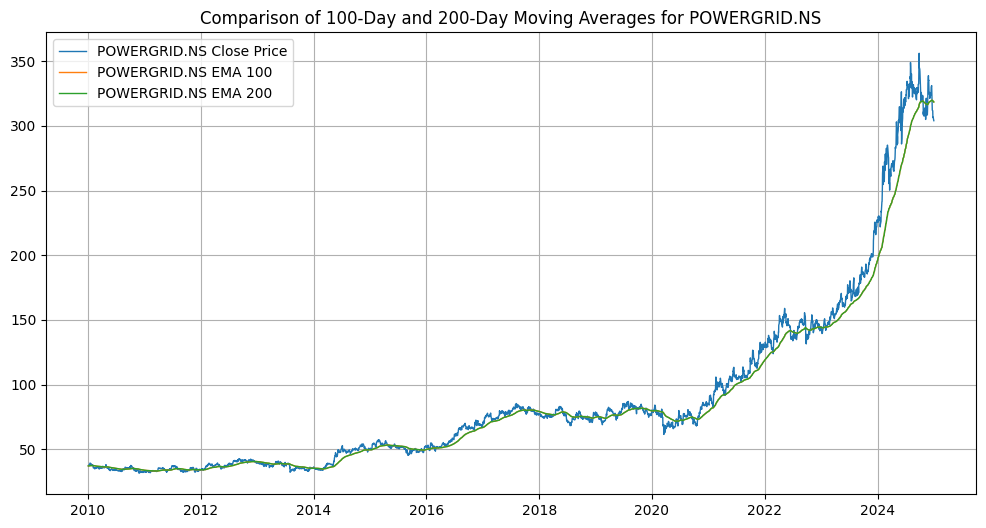

In [44]:
data = 'POWERGRID.NS'

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{data} Close Price', linewidth=1)
plt.plot(ema100, label=f'{data} EMA 100', linewidth=1)
plt.plot(ema200, label=f'{data} EMA 200', linewidth=1)
plt.grid(True)
plt.title(f'Comparison of 100-Day and 200-Day Moving Averages for {data}')
plt.legend()
plt.show()


# Spliting the dataset into training (70%) and testing (30%) set

In [45]:
# Splitting data into training and testing
#lstm over rnn
train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


In [46]:
train.shape

(2589, 1)

In [47]:
test.shape

(1110, 1)

In [48]:
train.head()

Ticker,POWERGRID.NS
Date,
2010-01-04,37.102531
2010-01-05,37.218075
2010-01-06,37.482132
2010-01-07,37.812229
2010-01-08,37.911251


In [49]:
test.head()

Ticker,POWERGRID.NS
Date,
2020-07-08,72.362175
2020-07-09,73.129494
2020-07-10,73.577095
2020-07-13,72.085091
2020-07-14,69.633942


# Using MinMax scaler for normalization of the dataset

---



In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
data_training_array = scaler.fit_transform(train)
data_training_array

array([[0.1025771 ],
       [0.10465746],
       [0.10941183],
       ...,
       [0.79768032],
       [0.80075063],
       [0.76314127]])

In [52]:
data_training_array.shape

(2589, 1)

In [53]:
import numpy as np
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [54]:
x_train.shape

(2489, 100, 1)

In [55]:
#module buildainf

In [56]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

data = yf.download('POWERGRID.NS', start='2021-01-01')
print(data.columns)  # Check available columns

# Select the column you need (adjust name as needed)
train_close = data[['Close']]  # or 'Adj Close'

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(train_close)


[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])


In [58]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [59]:
x_train.shape

(3693, 100, 1)

# ML Model (LSTM)

---



In [60]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [61]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\admin\Downloads\stock(1)\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [130]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 0.0319 - mean_absolute_error: 0.1054
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - loss: 0.0053 - mean_absolute_error: 0.0420
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 0.0029 - mean_absolute_error: 0.0312
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 45s 215ms/step - loss: 0.0026 - mean_absolute_error: 0.0298
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - loss: 0.0026 - mean_absolute_error: 0.0306
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - loss: 0.0034 - mean_absolute_error: 0.0340
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - loss: 0.0030 - mean_absolute_error: 0.0332
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - loss: 0.0020 - mean_absolute_error: 0.0280
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - loss: 0.0020 - mean_absolute_error: 0.0265
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 194ms/step - loss: 0.0022 - mean_absolute_error: 0.0296

In [63]:
model.save('stock_dl_model.h5')


In [88]:
past_100_days = train.tail(100)

In [89]:
#test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [93]:
final_df = pd.concat([past_100_days, test], ignore_index=True)


In [95]:
final_df.head()

Ticker,POWERGRID.NS
0,78.283867
1,76.721474
2,77.913818
3,77.852142
4,78.345535


In [96]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05713145],
       [0.05182918],
       [0.05587562],
       ...,
       [0.83234889],
       [0.82932991],
       [0.82312417]])

In [97]:
input_data.shape

(1210, 1)

In [98]:
input_data = scaler.fit_transform(final_df)

# Testing the model

---



In [99]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [100]:
x_test.shape

(1110, 100, 1)

# Making prediction and plotting the graph of predicted vs actual values

---



In [101]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [102]:
y_pred.shape

(1110, 1)

In [103]:
y_test

array([0.03703507, 0.03963912, 0.04115813, ..., 0.83234889, 0.82932991,
       0.82312417])

In [104]:
y_pred

array([[-0.0001036 ],
       [-0.000106  ],
       [-0.000108  ],
       ...,
       [-0.00314042],
       [-0.00313683],
       [-0.00313053]], dtype=float32)

In [105]:
scaler.scale_

array([0.00339369])

In [106]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

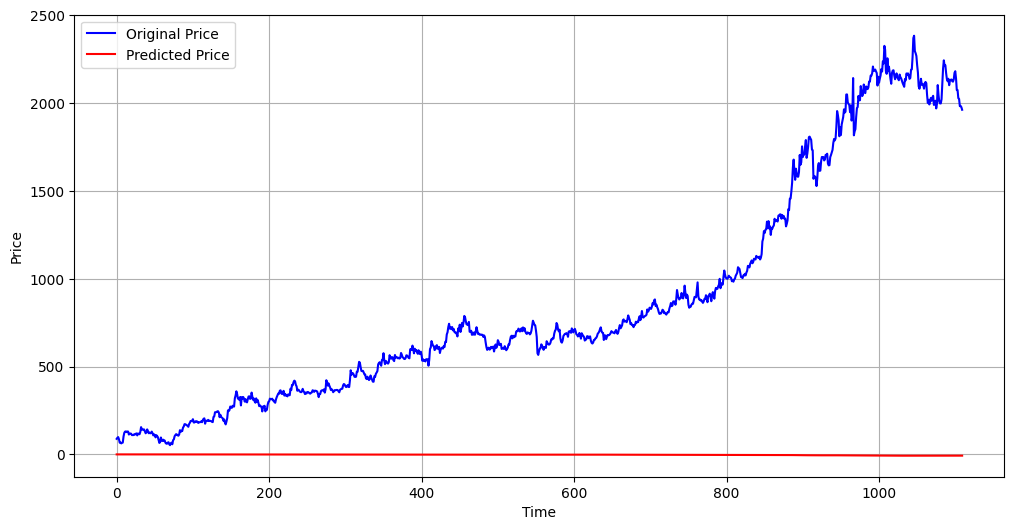

In [107]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [108]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 100.30%


Calculation of R2 score

In [109]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: -1.8814847706999038


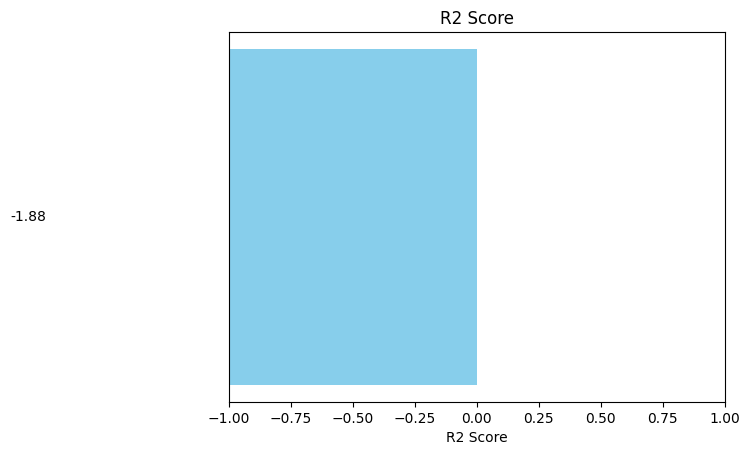

In [110]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

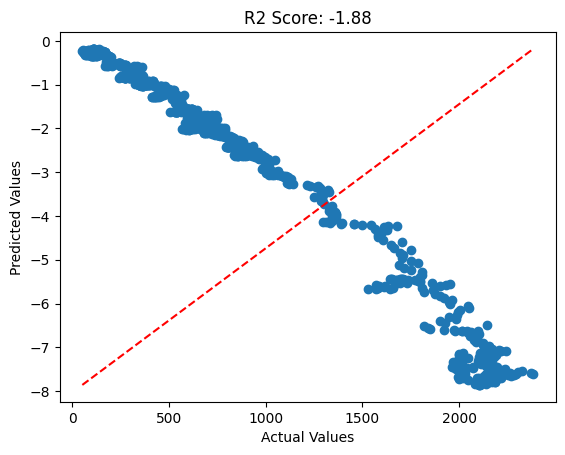

In [111]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()